In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb
from concurrent.futures import ThreadPoolExecutor, as_completed
import dask.dataframe as dd
import sys

sys.path.append("../../scripts")
%aimport initial_map
%aimport map_refiner
%aimport complexity
%aimport finder
%aimport preprocess
%aimport complexity
    
import glob
from tqdm import tqdm  # progress bar

In [3]:
AD = finder.Barcode(name="AD",
                             preceder="AGGAGCA",
                             post="TGATAAG",
                             length=186)

AD_BC = finder.Barcode(name="AD_BC",
                             preceder="GGCCTC",
                             post="GGGCCC",
                             length=20)
RPTR_BC = finder.Barcode(name="RPTR_BC",
                             preceder="CTCGAG",
                             post="GGCCGC",
                             length=20)

# Refining - using pre and post

Generated initial map at global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/notebooks/Plasmodium/run_step1_refiner_on_Plasmodium.py

In [4]:
SK_order_refiner_pre_post = map_refiner.MapRefiner(db_path = "/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/duckdb/Plasm.db",
                                bc_objects = [AD, AD_BC, RPTR_BC],
                                column_pairs = [("RPTR_BC", "AD")],
                                design_check = True, 
                                descriptor = "SK_order",
                                map_order = ['grouped', 'thresholded', 'barcode_exists', 'unique_target', 'quality_designed'],
                                step_name = "step1",
                                should_check_exists = True,
                                plot_histograms = True)

Base prefix (stable across descriptors): step1_AD_AD_BC_RPTR_BC_
Full prefix for this instance: step1_AD_AD_BC_RPTR_BC_SK_order_

Using the following step order:
1. initial
2. grouped
3. thresholded
4. barcode_exists
5. unique_target
6. quality_designed



Grouping step1_AD_AD_BC_RPTR_BC_initial...
Skipping — table step1_AD_AD_BC_RPTR_BC_initial_grouped already exists and is initial/grouped.


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

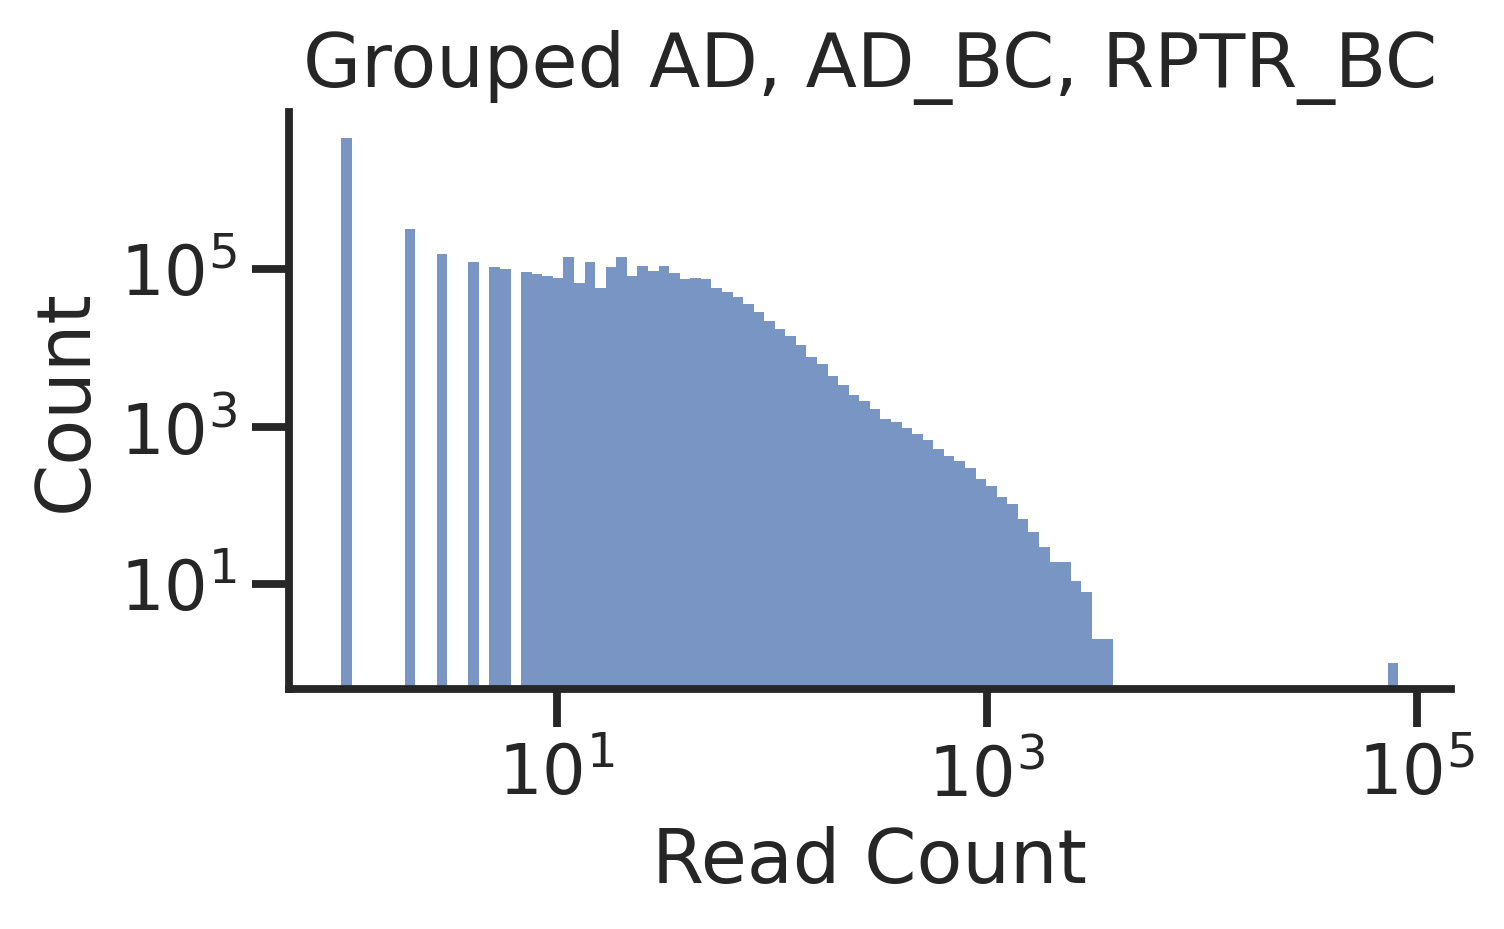

Done in 8.54 seconds.

Thresholding...
Using reads threshold of 10.


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

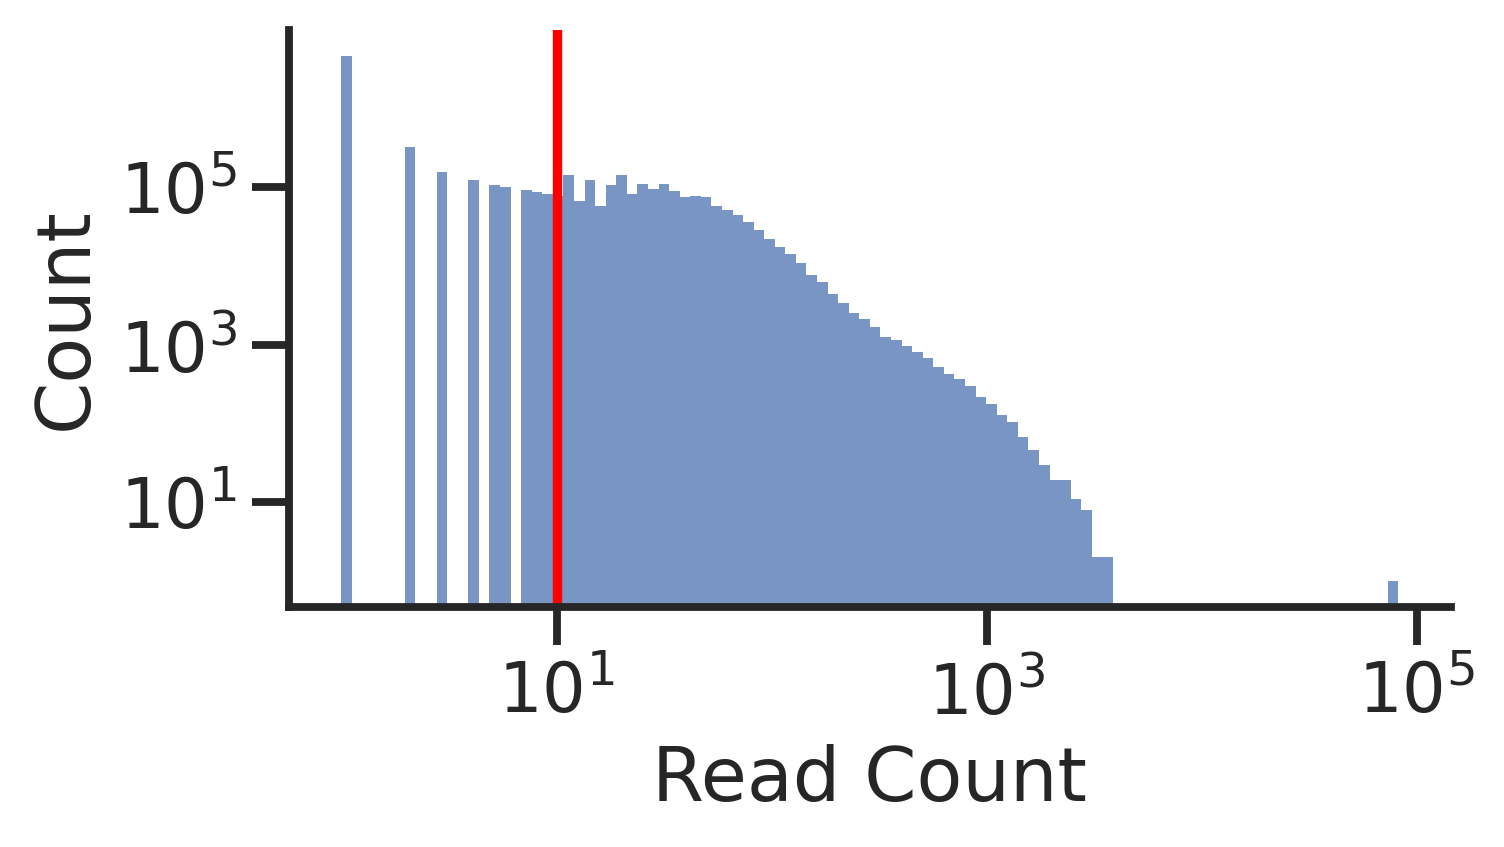

Done in 9.07 seconds.

Removing rows with null or empty barcodes (excluding AD)...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Done in 3.16 seconds.

Filtering keys to keep only those mapping to a single target...
	Checking each RPTR_BC only maps to one AD.


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Done in 3.87 seconds.

Filtering to quality and designed...
Done in 1.30 seconds.

Done.


In [17]:
SK_order_refiner_pre_post.refine_map_from_db()

Saved loss summary table as 'step1_AD_AD_BC_RPTR_BC_SK_order_loss_summary'
Done in 2.48 seconds.



Text(0.5, 1.0, 'Plasmodium, with pre and post flanking sequences')

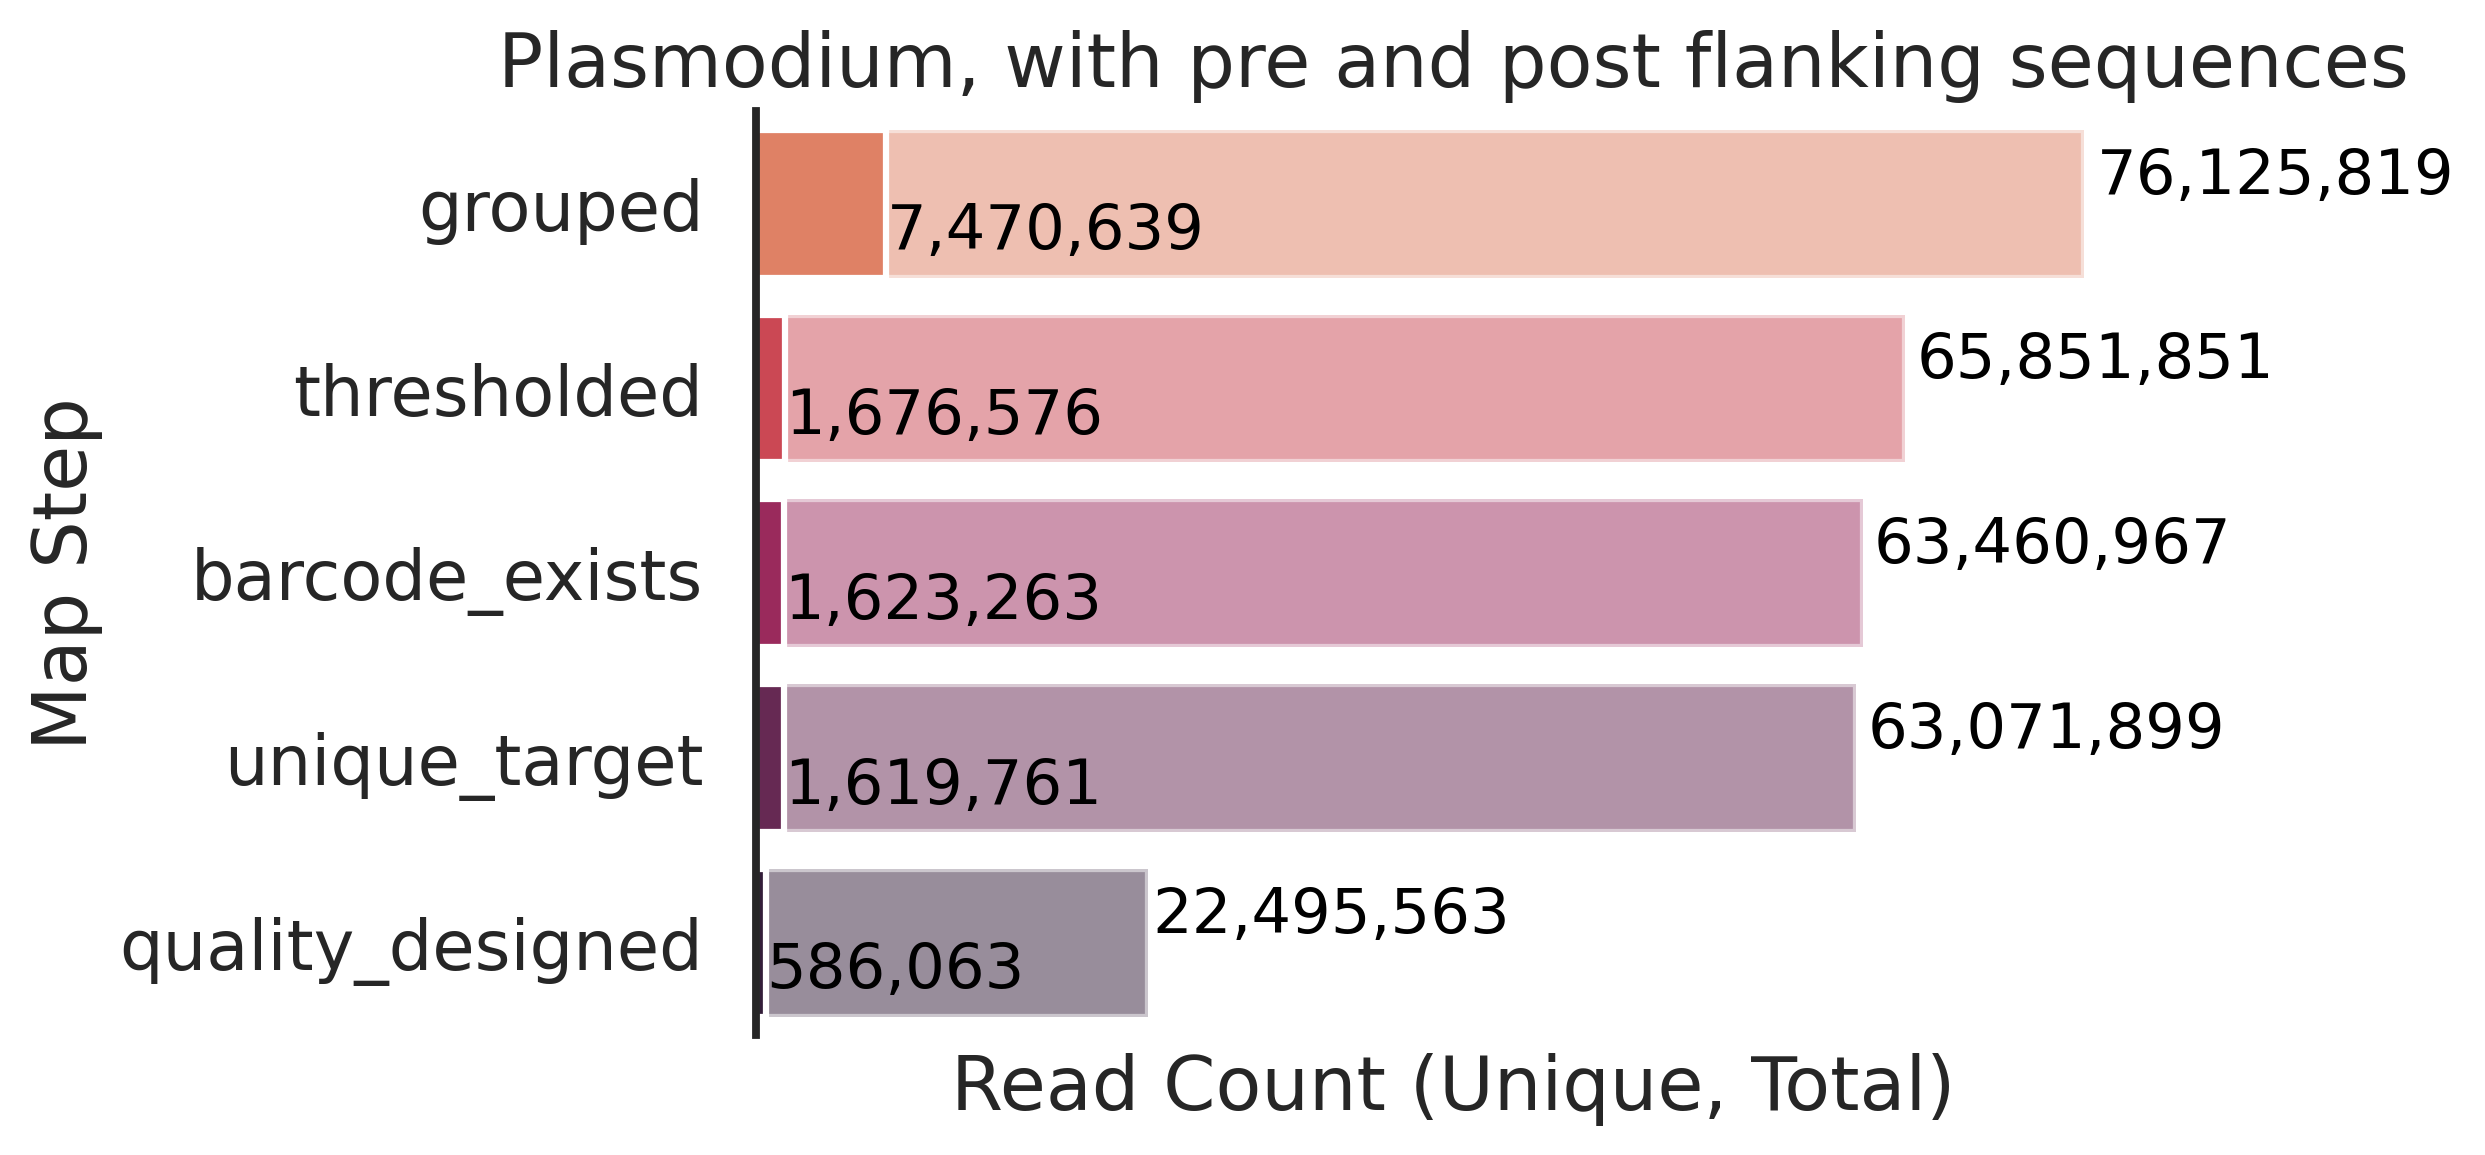

In [8]:
SK_order_refiner_pre_post.save_loss_table()
ax = SK_order_refiner_pre_post.plot_loss(text_offset = -0.15)
plt.title("Plasmodium, with pre and post flanking sequences")

# Using only pre

In [10]:
SK_order_refiner_pre_only = map_refiner.MapRefiner(db_path = "/global/scratch/projects/fc_mvslab/OpenProjects/Sanjana/TREBL/duckdb/Plasm_no_post.db",
                                bc_objects = [AD, AD_BC, RPTR_BC],
                                column_pairs = [("RPTR_BC", "AD")],
                                design_check = True, 
                                descriptor = "SK_order",
                                                   reads_threshold = 10,
                                map_order = ['grouped', 'thresholded', 'barcode_exists', 'unique_target', 'quality_designed'],
                                step_name = "step1",
                                should_check_exists = True,
                                plot_histograms = True)

Base prefix (stable across descriptors): step1_AD_AD_BC_RPTR_BC_
Full prefix for this instance: step1_AD_AD_BC_RPTR_BC_SK_order_

Using the following step order:
1. initial
2. grouped
3. thresholded
4. barcode_exists
5. unique_target
6. quality_designed



Grouping step1_AD_AD_BC_RPTR_BC_initial...
Skipping — table step1_AD_AD_BC_RPTR_BC_initial_grouped already exists and is initial/grouped.


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

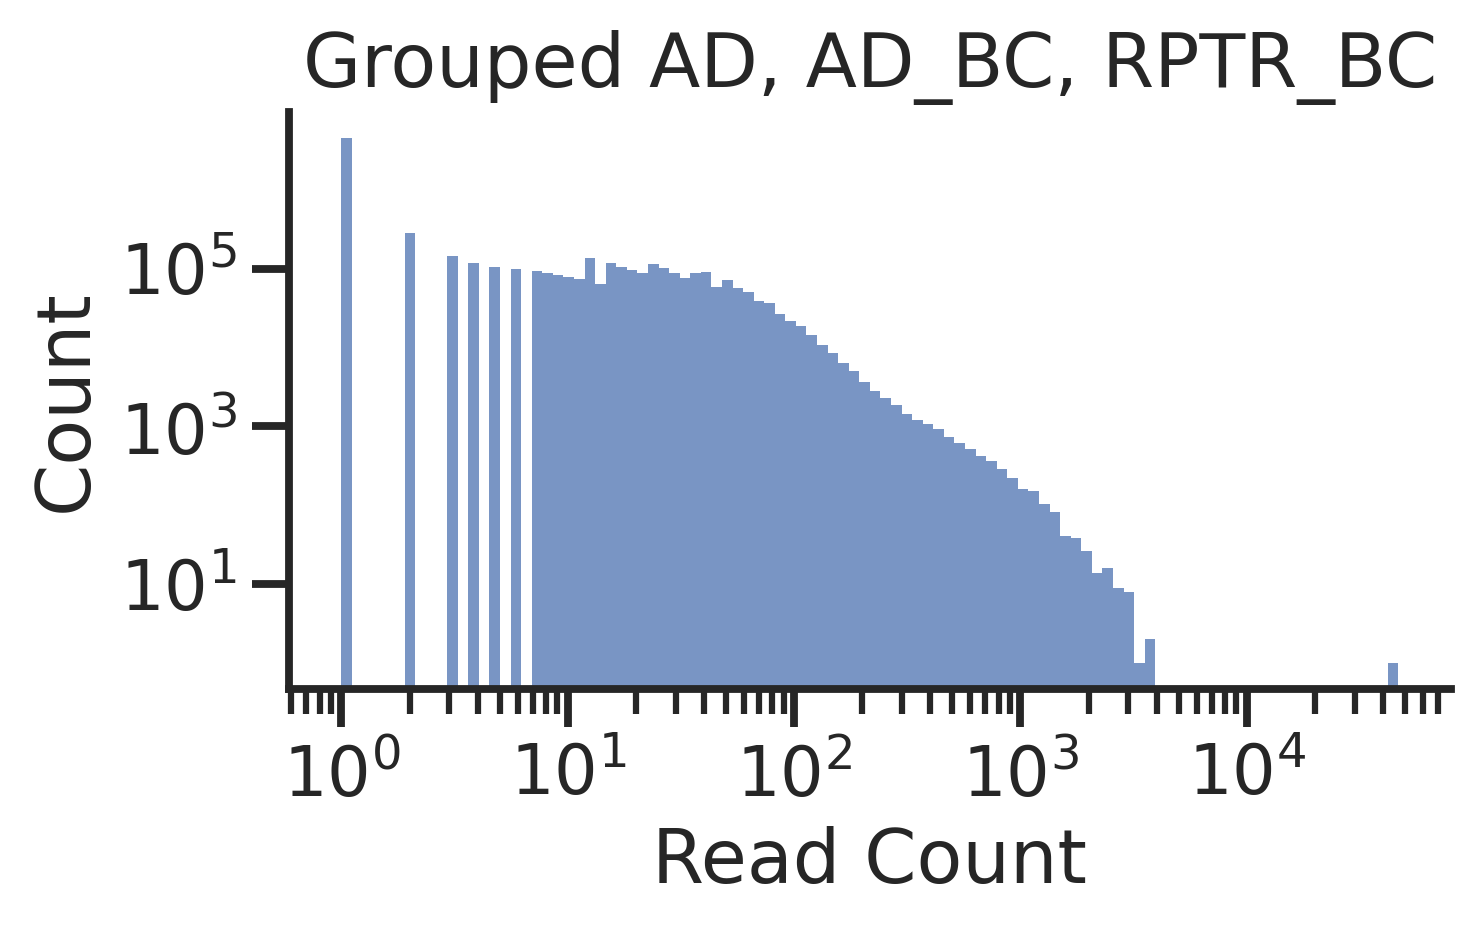

Done in 10.72 seconds.

Thresholding...
Using reads threshold of 10.


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

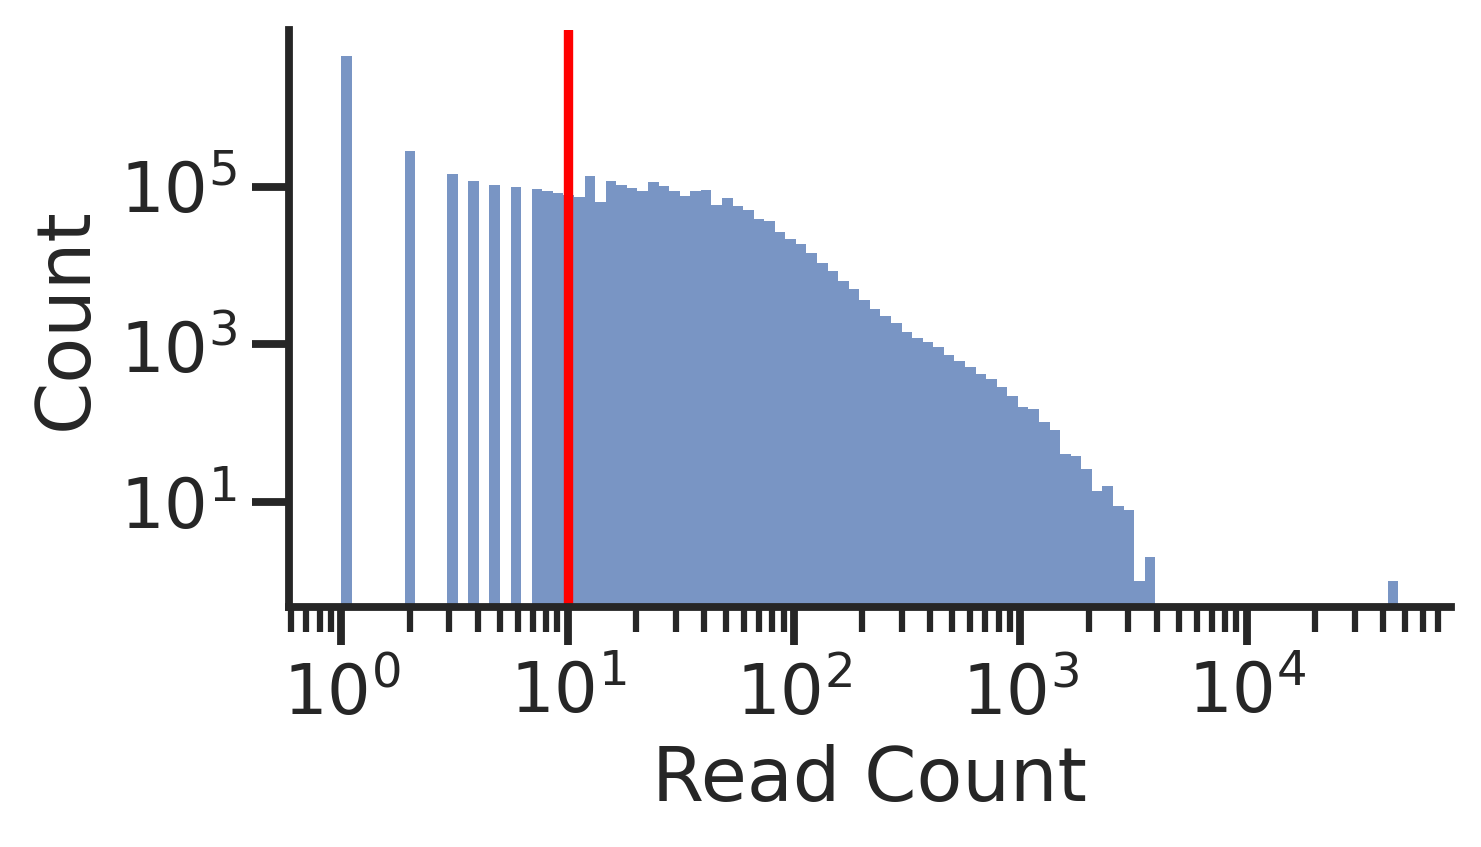

Done in 9.82 seconds.

Removing rows with null or empty barcodes (excluding AD)...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Done in 3.23 seconds.

Filtering keys to keep only those mapping to a single target...
	Checking each RPTR_BC only maps to one AD.


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Done in 3.94 seconds.

Filtering to quality and designed...


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Done in 3.14 seconds.

Done.


In [16]:
sns.set_style('white')
SK_order_refiner_pre_only.refine_map_from_db()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

Saved loss summary table as 'step1_AD_AD_BC_RPTR_BC_SK_order_loss_summary'
Done in 2.71 seconds.

Saved loss summary table as 'step1_AD_AD_BC_RPTR_BC_SK_order_loss_summary'
Done in 2.54 seconds.



Text(0.5, 1.0, 'Plasmodium, with pre flanking sequence')

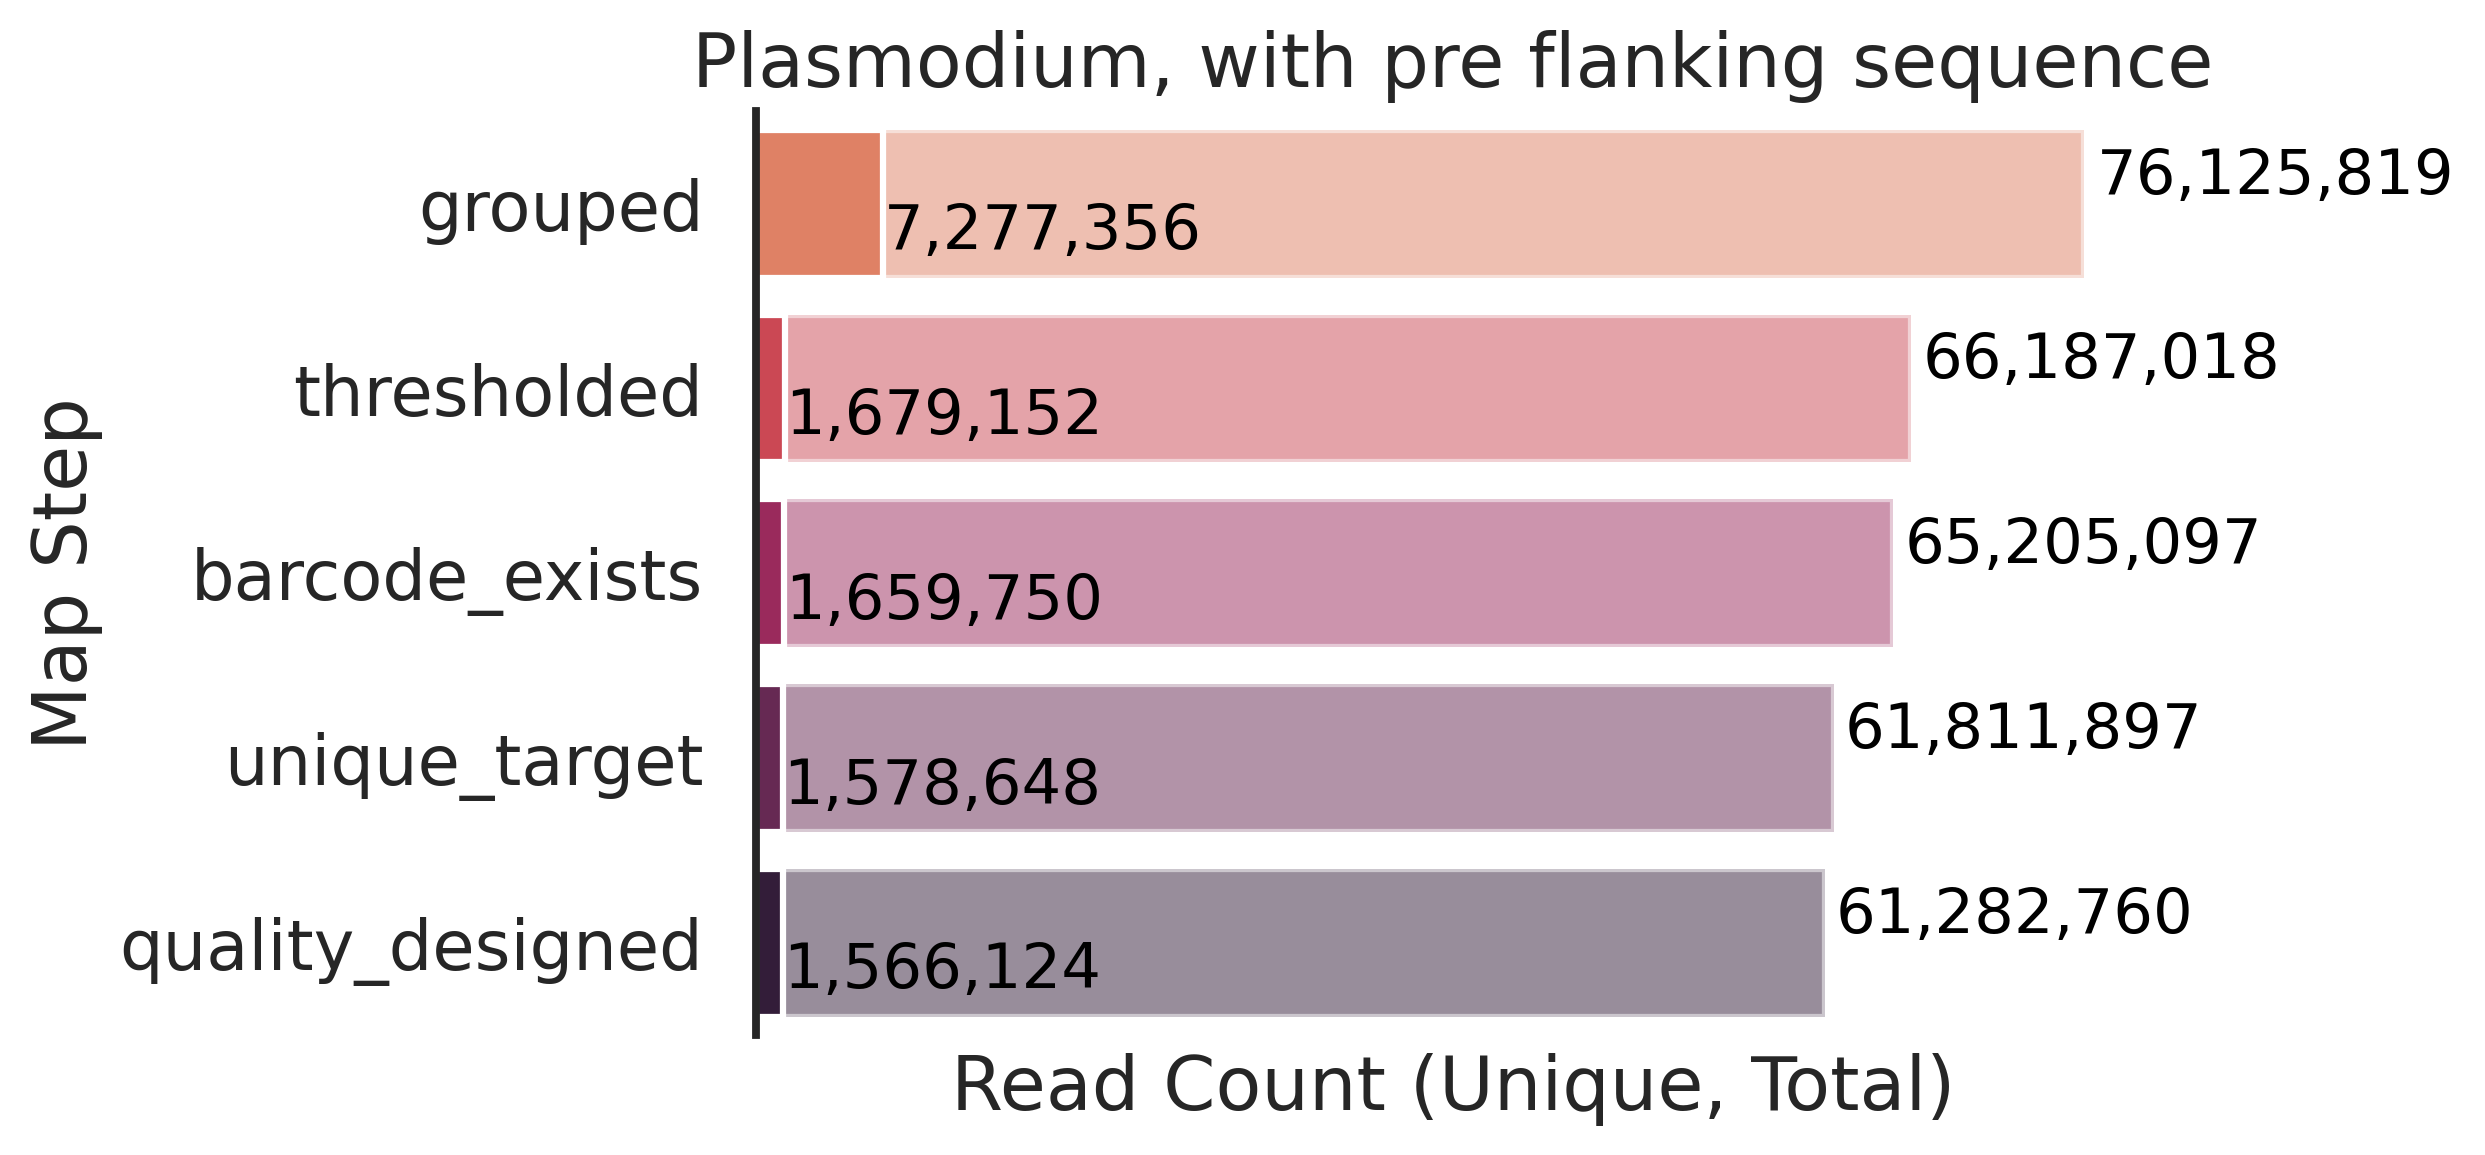

In [14]:
SK_order_refiner_pre_only.save_loss_table()
ax = SK_order_refiner_pre_only.plot_loss(text_offset = -0.15)
plt.title("Plasmodium, with only pre flanking sequence")

Saved loss summary table as 'step1_AD_AD_BC_RPTR_BC_SK_order_loss_summary'
Done in 2.26 seconds.

Saved loss summary table as 'step1_AD_AD_BC_RPTR_BC_SK_order_loss_summary'
Done in 2.57 seconds.



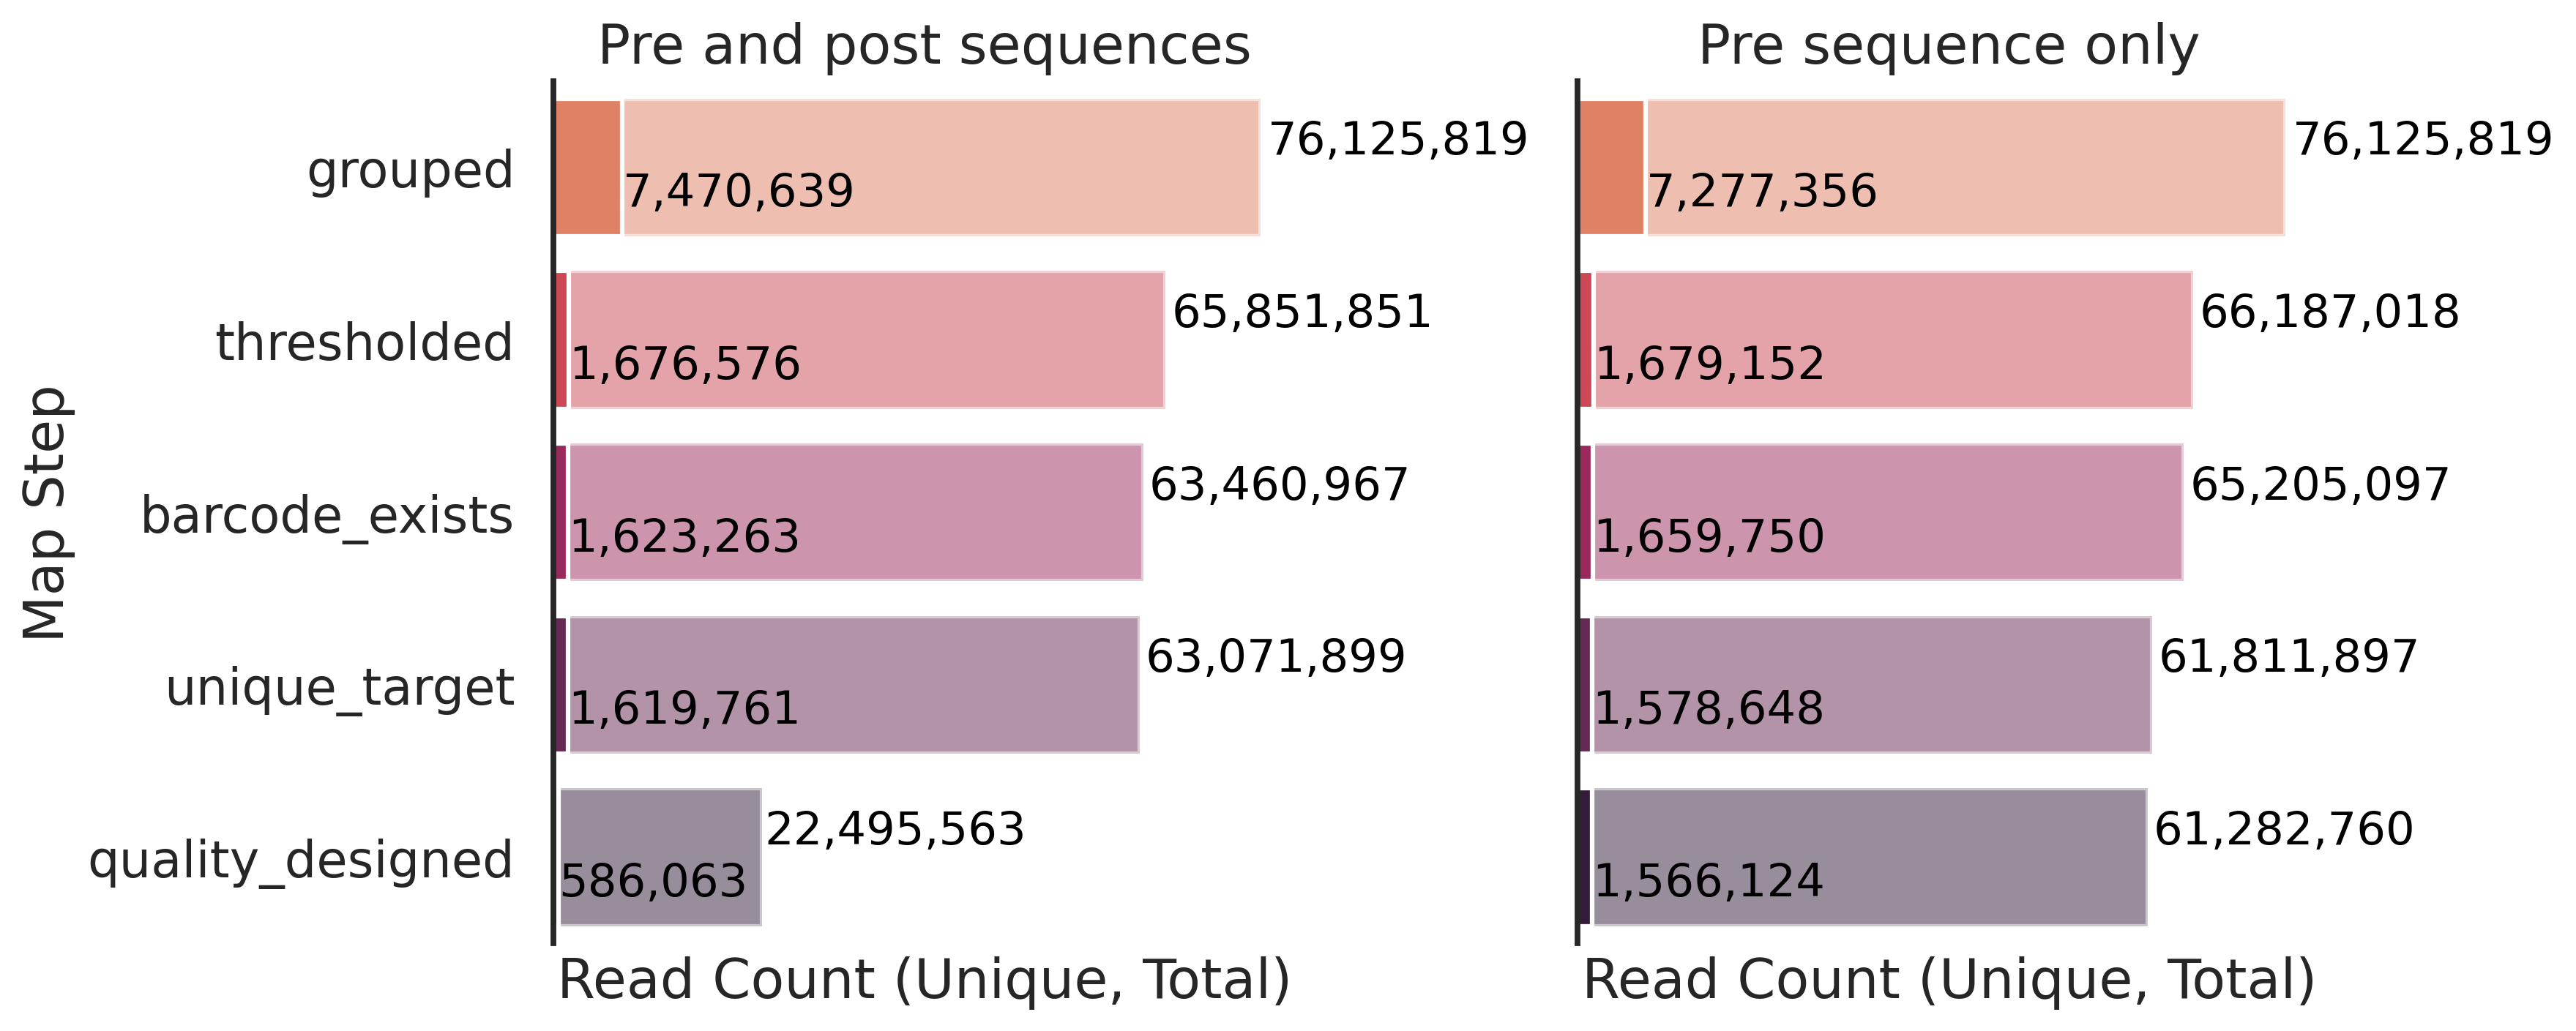

In [30]:
fig, axs = plt.subplots(1, 2, figsize = (12,5), dpi = 300, sharey = True, sharex = True)

SK_order_refiner_pre_post.plot_loss(text_offset = -0.15, ax = axs[0])
axs[0].set_title("Pre and post sequences")

SK_order_refiner_pre_only.plot_loss(text_offset = -0.15, ax = axs[1])
axs[1].set_title("Pre sequence only")
axs[1].set_ylabel("")

fig.tight_layout(pad = 1)